# Módulo 4 - Estatística Básica

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np

In [2]:
# Importando os dados
dados = pd.read_excel('../Modulo_3/planilha_modulo3.xlsx', engine="openpyxl")

## Média, Mediana, Moda, Desvio Padrão, Máximo e Mínimo

In [3]:
media_idade = dados['IDADE'].mean()

In [4]:
mediana_idade = dados['IDADE'].median()

In [5]:
moda_idade = dados["IDADE"].mode()

In [6]:
desvio_padrao_idade = dados["IDADE"].std()

In [7]:
min_idade = dados["IDADE"].min()

In [8]:
max_idade = dados["IDADE"].max()

In [9]:
print('Análise das Idades')
print('MÉDIA        ', media_idade.round())
print('MEDIANA      ', mediana_idade.round())
print('MODA         ', moda_idade)
print('DESVIO PADRÃO', desvio_padrao_idade.round())
print('MÁXIMO       ', max_idade.round())
print('MÍNIMO       ', min_idade.round())

Análise das Idades
MÉDIA         31.0
MEDIANA       30.0
MODA          0    27.0
Name: IDADE, dtype: float64
DESVIO PADRÃO 7.0
MÁXIMO        54.0
MÍNIMO        18.0


In [10]:
pd.pivot_table(dados, values = ['IDADE'], index = ['GENERO'], columns = ['NIVEL'], aggfunc='mean').round(2)

IDADE              
NIVEL                Júnior  Pleno Sênior
GENERO                                   
Feminino              29.32  30.42  33.22
Masculino             27.46  30.07  33.30
Prefiro não informar  24.50  27.25  30.00

In [11]:
pd.pivot_table(dados, values = ['SALARIO'], index = ['GENERO'], columns = ['NIVEL'], aggfunc='mean').round(2)

SALARIO                   
NIVEL                  Júnior    Pleno    Sênior
GENERO                                          
Feminino              4000.81  8039.93  11746.87
Masculino             3915.25  8469.88  15936.83
Prefiro não informar  2701.00  8458.75  10174.00

## Dados Faltantes

### Gênero

In [12]:
dados.groupby('GENERO', dropna= False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      12
NaN                        9
Name: ID, dtype: int64

podemos preencher os nulos por 'Prefiro não informar'

In [13]:
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

In [14]:
dados.groupby('GENERO', dropna= False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      21
Name: ID, dtype: int64

### Idade

In [15]:
dados['IDADE'].isnull().value_counts()

IDADE
False    4197
True       74
Name: count, dtype: int64

In [16]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+      68
17-21     6
Name: count, dtype: int64

temos que há pessoas que não registraram a idade, mas registraram a faixa etária.
podemos fazer a média da idade preenchida para cada faixa e preencher os dados faltantes com ela

In [17]:
media_17_21= dados[dados['FAIXA IDADE']== '17-21']['IDADE'].mean()

In [18]:
dados.loc[(dados['FAIXA IDADE']== '17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [19]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+    68
Name: count, dtype: int64

In [20]:
dados[dados['FAIXA IDADE']== '55+']['IDADE']

9      NaN
66     NaN
96     NaN
121    NaN
156    NaN
        ..
4001   NaN
4043   NaN
4048   NaN
4061   NaN
4215   NaN
Name: IDADE, Length: 68, dtype: float64


Ninguém com mais de 55 anos preencheu sua idade, podemos supor que há um erro no formulário.

Um estratégia é preencher esses dados com a média geral

In [21]:
media_geral = int(dados['IDADE'].mean().round())

In [22]:
## substituindo valores
dados.loc[(dados['FAIXA IDADE']== '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [23]:
# conferindo
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

Series([], Name: count, dtype: int64)

### Salário

In [24]:
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()
# quem não preencheu salário, também não preencheu faixa salarial

Series([], Name: count, dtype: int64)

In [26]:
## completando pela mediana
mediana_salario = dados[dados['SALARIO'].notnull()]['SALARIO'].median()

In [27]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

## Valores Discrepantes (Outliers)

In [28]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1a602484dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a60263de90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a602617410>],
 'medians': [<matplotlib.lines.Line2D at 0x1a60263f590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a602644190>],
 'means': []}

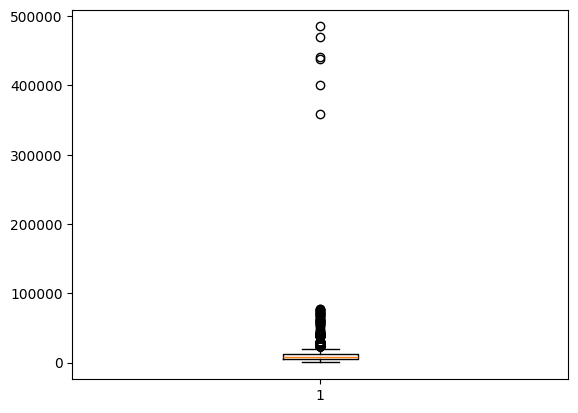

In [29]:
plt.boxplot(dados['SALARIO'])

In [30]:
dados['SALARIO'].describe()

count      4271.000000
mean      10517.533482
std       18096.210989
min          35.000000
25%        4751.500000
50%        7625.500000
75%       11794.500000
max      485191.000000
Name: SALARIO, dtype: float64

In [31]:
Q3 = dados['SALARIO'].quantile(.25)
Q1 = dados['SALARIO'].quantile(.75)
IQR = Q3 - Q1
limSup = Q3 + (1.5*IQR)
limInf = Q1 - (1.5*IQR)

In [32]:
dados['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
de R$ 8.001/mês a R$ 12.000/mês     752
de R$ 4.001/mês a R$ 6.000/mês      584
de R$ 6.001/mês a R$ 8.000/mês      527
de R$ 12.001/mês a R$ 16.000/mês    437
de R$ 3.001/mês a R$ 4.000/mês      303
de R$ 2.001/mês a R$ 3.000/mês      285
de R$ 16.001/mês a R$ 20.000/mês    229
de R$ 1.001/mês a R$ 2.000/mês      216
de R$ 20.001/mês a R$ 25.000/mês    134
de R$ 25.001/mês a R$ 30.000/mês     77
de R$ 30.001/mês a R$ 40.000/mês     70
Acima de R$ 40.001/mês               45
Menos de R$ 1.000/mês                35
Name: count, dtype: int64

In [33]:
media_salario = dados['SALARIO'].mean()

In [34]:
desvio_salario = dados['SALARIO'].std()

In [35]:
limite_superior = media_salario +3*desvio_salario

In [36]:
limite_superior

64806.166448975964

In [37]:
dados[dados['SALARIO']> limite_superior]['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
Acima de R$ 40.001/mês              19
de R$ 30.001/mês a R$ 40.000/mês     3
Name: count, dtype: int64

In [38]:
media_30_40 = dados[(dados['FAIXA SALARIAL']== 'de R$ 30.001/mês a R$ 40.000/mês')&(dados['SALARIO']<limite_superior)]['SALARIO'].mean()

In [39]:
# substituindo os dados discrepante entre 30 e 40k
dados.loc[(dados['FAIXA SALARIAL']== 'de R$ 30.001/mês a R$ 40.000/mês')&(dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [40]:
media_40 = dados[(dados['FAIXA SALARIAL']== 'Acima de R$ 40.001/mês')&(dados['SALARIO']<limite_superior)]['SALARIO'].mean()
dados.loc[(dados['FAIXA SALARIAL']== 'Acima de R$ 40.001/mês')&(dados['SALARIO']>limite_superior), 'SALARIO'] = media_40

In [41]:
## conferindo se ainda tem dados discrepantes
dados[dados['SALARIO']> limite_superior]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6026e79d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a6026f12d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a6026e6cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a6026f2850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a6026f3390>],
 'means': []}

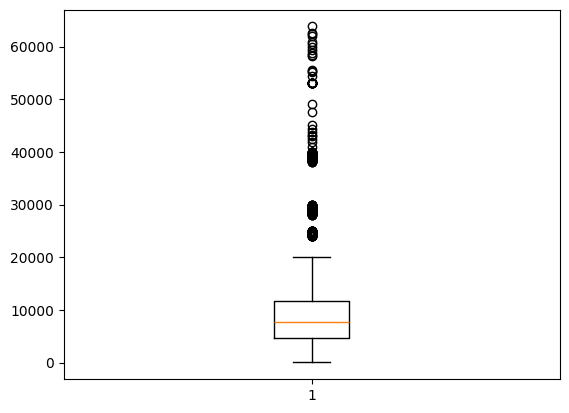

In [42]:
plt.boxplot(dados['SALARIO'])

## Distribuição Amostral e Intervalo de Confiança

In [45]:
salarios = dados['SALARIO']

In [46]:
media_amostral = np.mean(salarios)
media_amostral

9904.390109813306

In [48]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579352

In [49]:
# confiança de 95%
nivel_confianca = 0.95

In [50]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [51]:
from scipy import stats

In [52]:
erro_padrao = stats.sem(salarios) # calcula o erro médio padrão da amostra
erro_padrao

127.11109872023638

In [54]:
grau_liberdade = tamanho_amostra - 1

In [55]:
intervalo_confianca = stats.t.interval(nivel_confianca,grau_liberdade, loc = media_amostral, scale= erro_padrao)
intervalo_confianca

(9655.186295869078, 10153.593923757535)

com 95% de confiança que a média salarial está entre 9655,19 reais e 10153,60 reais

In [64]:
intervalo_confianca = stats.t.interval(0.999,grau_liberdade, loc = media_amostral, scale= erro_padrao)
intervalo_confianca

(9485.83782074697, 10322.942398879646)

In [65]:
intervalo_confianca = stats.t.interval(0.70,grau_liberdade, loc = media_amostral, scale= erro_padrao)
intervalo_confianca

(9772.631922207403, 10036.14829741921)